In [3]:
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from mlxtend.classifier import StackingClassifier
import numpy as np

# We will load the pre-trained VGG model, which will be used for
# feature extraction.
model = VGG19(weights='imagenet', include_top='False')
print(model.summary())

574710816/574710816 [==============================] - 11s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [4]:
# These labels are the class values for our model.
labels = [
    "pituitary_tumor",
    "no_tumor",
    "meningioma_tumor",
    "glioma_tumor"
]

training_records = []
testing_records = []

# Traverse through the Kaggle dataset directory to run
# VGG against the images, with features derived from the
# activation outputs of the layers in the network.
#
# Do for both training and testing datasets.

for label in labels:
    testing_path = "./brain_tumor_data/Training/" + label + "/"
    print("Loading training images for ",label,"...")
    for image_path in os.listdir(testing_path):
        full_image_path = testing_path + image_path
        current_image = image.load_img(full_image_path, target_size = (224, 224))
        x = image.img_to_array(current_image)
        x = np.expand_dims(x, axis = 0)
        x = preprocess_input(x)

        features = model.predict(x)
        training_record = {
            "features": features[0],
            "label": label
        }
        training_records.append(training_record)
    print("Done!")

for label in labels:
    training_path = "./brain_tumor_data/Testing/" + label + "/"
    print("Loading testing images for ",label,"...")
    for image_path in os.listdir(training_path):
        full_image_path = training_path + image_path
        current_image = image.load_img(full_image_path, target_size = (224, 224))
        x = image.img_to_array(current_image)
        x = np.expand_dims(x, axis = 0)
        x = preprocess_input(x)

        features = model.predict(x)
        testing_record = {
            "features": features[0],
            "label": label
        }
        testing_records.append(testing_record)
#         break
    print("Done!")
#     break

Loading training images for  pituitary_tumor ...
1/1 [==============================] - 0s 182ms/step


2023-08-07 23:34:42.320576: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 120ms/step
Done!
Loading training images for  no_tumor ...
1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 120ms/step
Done!
Loading training images for  meningioma_tumor ...
1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 122ms/step
Done!
Loading training images for  glioma_tumor ...
1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 119ms/step
Done!
Loading testing images for  pituitary_tumor ...
1/1 [==============================] - 0s 118ms/step
Done!
Loading testing images for  no_tumor ...
1/1 [==============================] - 0s 118ms/step
Done!
Loading testing images for  meningioma_tumor ...
1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 117ms/step
Done!
Loading testing images for  glioma_tumor ...
1/1 [==============================] - 0s 118ms/step
Done!


In [6]:
training_df = pd.DataFrame(training_records)
training_df

,features,label
0,"[2.3303314e-06, 1.2116118e-05, 5.2939584e-05, ...",pituitary_tumor
1,"[4.4591012e-05, 8.396921e-06, 0.00060421374, 0...",pituitary_tumor
2,"[2.8305362e-06, 3.1687564e-06, 6.4643245e-05, ...",pituitary_tumor
3,"[1.6115704e-05, 1.8456458e-05, 0.00026864605, ...",pituitary_tumor
4,"[1.73859e-05, 4.7886024e-06, 4.053428e-05, 0.0...",pituitary_tumor
...,...,...
2865,"[1.5304636e-06, 2.1537484e-05, 4.9992523e-06, ...",glioma_tumor
2866,"[2.9296794e-05, 3.2279317e-05, 0.00031822926, ...",glioma_tumor
2867,"[2.3947805e-05, 3.8125816e-06, 0.00011212337, ...",glioma_tumor
2868,"[1.8877547e-05, 9.929996e-06, 6.925164e-05, 0....",glioma_tumor


In [7]:
testing_df = pd.DataFrame(testing_records)
testing_df

,features,label
0,"[3.0235055e-06, 9.019894e-06, 8.336825e-05, 7....",pituitary_tumor
1,"[1.2055087e-05, 3.3377803e-06, 4.2114865e-05, ...",pituitary_tumor
2,"[4.5924735e-06, 1.1130146e-05, 8.944484e-06, 5...",pituitary_tumor
3,"[0.0002203229, 5.202219e-05, 0.001819689, 0.01...",pituitary_tumor
4,"[3.9802904e-05, 4.9424245e-05, 2.5285843e-05, ...",pituitary_tumor
...,...,...
389,"[0.00019623911, 0.000105485444, 9.832038e-05, ...",glioma_tumor
390,"[2.1108877e-05, 1.4967751e-05, 8.384557e-05, 0...",glioma_tumor
391,"[2.2142241e-07, 3.4133764e-06, 4.2361964e-05, ...",glioma_tumor
392,"[4.412244e-06, 5.410582e-05, 5.5164546e-05, 0....",glioma_tumor


In [8]:
training_features_list = training_df['features'].tolist()
y_train = training_df['label'].tolist()

testing_features_list = training_df['features'].tolist()
y_test = training_df['label'].tolist()

In [9]:
training_features_list[0]

array([2.33033143e-06, 1.21161183e-05, 5.29395838e-05, 7.12182591e-05,
       1.97576701e-05, 1.05391671e-04, 8.04525844e-05, 3.16424339e-05,
       2.05668966e-05, 1.46025468e-06, 3.26036229e-06, 7.88228954e-06,
       1.76599951e-05, 6.29205670e-06, 2.71051795e-05, 2.77484241e-06,
       1.48391814e-06, 1.93685191e-05, 3.38968107e-06, 8.40843677e-06,
       1.19237086e-06, 1.94370864e-06, 1.04967921e-05, 4.19333264e-06,
       1.00202842e-05, 2.22766107e-06, 1.77340951e-06, 1.15946932e-05,
       1.51017366e-05, 4.46314971e-06, 1.65212241e-05, 2.17561668e-04,
       5.32934100e-05, 2.78270381e-05, 3.04550813e-05, 1.69971754e-05,
       1.71413212e-05, 1.61380322e-05, 3.85538333e-05, 1.52629291e-05,
       2.10983653e-05, 5.85753651e-06, 3.68275687e-06, 1.66687387e-05,
       8.47037700e-06, 6.63210540e-06, 4.78342045e-05, 2.80320510e-05,
       1.65452434e-06, 5.81723179e-06, 4.11257133e-06, 8.30274366e-05,
       6.02106729e-06, 7.91138882e-06, 1.77955681e-05, 1.27887779e-05,
      

In [15]:
# We'll prepare our data next for principal component analysis (PCA).
training_features_matrix = np.array(training_features_list)
testing_features_matrix = np.array(testing_features_list)

# Ensure scaling is done on the data before proceeding.
scaler = StandardScaler()
training_scaled_features = scaler.fit_transform(training_features_matrix)
test_scaled_features = scaler.transform(testing_features_matrix)

# Run PCA on the data. In the initial test, we stuck with 100 components
# and achieved explained variance of ~ 73%. This may be expanded in future
# iterations when testing with more complex ML models.

pca = PCA(n_components=100)
X_train = pca.fit_transform(training_scaled_features)
X_test = pca.transform(test_scaled_features)

explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Explained Variance (using 100 components): {explained_variance_ratio:.2%}")


Explained Variance (using 100 components): 72.59%


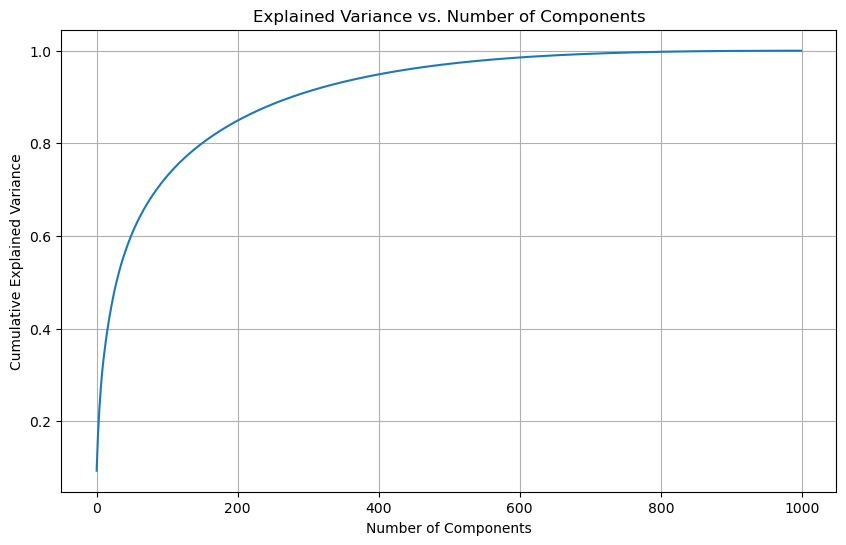

In [16]:
# Calculate the cumulative explained variance and plot to confirm what the ideal
# number of components would be. Since this code is being run on a local machine,
# we will stick to a smaller number of components and test a simpler ML model.

pca_full = PCA()
pca_full.fit(training_scaled_features)

cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [17]:
# Define model parameters and run grid search to determine best models.
# We stick with logistic regression for now and less options in the parameter
# space to reduce run time.

models_params = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                'penalty': ['l1', 'l2', 'elasticnet'],
#                 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'solver': ['newton-cg', 'lbfgs'],
                'max_iter': [1000]
            }
        }
#         'knn': {
#             'model': KNeighborsClassifier(),
#             'params': {
#                 'weights': ['uniform','distance'],
#                 'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40],
#                 'p': [1, 2],
#                 'n_neighbors': [3, 5, 7, 9, 11]
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeClassifier(),
#             'params': {
#                 'criterion': ["gini","entropy","log_loss"],
#                 'splitter': ["best","random"],
#                 'max_depth': [3, 5, 7, 9]
#             }
#         }
    }

models = []

for model_name, mp in models_params.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False, scoring='accuracy')
    clf.fit(X_train, y_train)
    
    model_record = {
        'name': model_name,
        'model': clf
    }
    
    models.append(model_record)

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sunil/miniconda3/envs/personal/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [18]:
models

[{'name': 'logistic_regression',
  'model': GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               estimator=LogisticRegression(),
               param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                           'max_iter': [1000],
                           'penalty': ['l1', 'l2', 'elasticnet'],
                           'solver': ['newton-cg', 'lbfgs']},
               scoring='accuracy')}]

In [19]:
# The results are surprising. Despite lower variance and a simpler model, we were
# still able to achieve 81% with just logistic regression! With more fine tuning,
# and potentially more complex models, the accuracy is sure to increase!

for record in models:
    print(record['name'])
    y_pred = record['model'].predict(X_test)
    print(f"Best Parameters: {record['model'].best_params_}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}\n")
    print(classification_report(y_test, y_pred))

logistic_regression
Best Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy Score: 0.8094076655052265

                  precision    recall  f1-score   support

    glioma_tumor       0.82      0.82      0.82       826
meningioma_tumor       0.74      0.70      0.72       822
        no_tumor       0.82      0.83      0.83       395
 pituitary_tumor       0.85      0.89      0.87       827

        accuracy                           0.81      2870
       macro avg       0.81      0.81      0.81      2870
    weighted avg       0.81      0.81      0.81      2870

